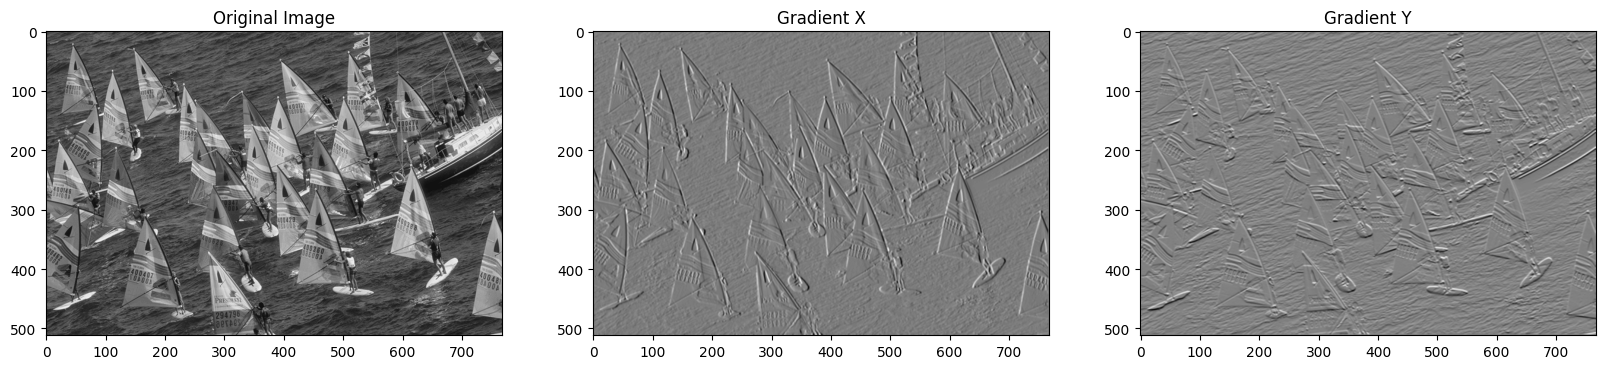

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 读取图像
image = cv2.imread('sails.png', cv2.IMREAD_GRAYSCALE)
gradient_x = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=5)
gradient_y = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=5)
# 可视化
plt.figure(figsize=(20, 5))
plt.subplot(131), plt.imshow(image, cmap='gray'), plt.title('Original Image')
plt.subplot(132), plt.imshow(gradient_x, cmap='gray'), plt.title('Gradient X')
plt.subplot(133), plt.imshow(gradient_y, cmap='gray'), plt.title('Gradient Y')
plt.show()

In [2]:
window_size = 3
# 计算Harris矩阵的三个分量
Ixx = cv2.GaussianBlur(gradient_x**2, (window_size, window_size), 0)
Iyy = cv2.GaussianBlur(gradient_y**2, (window_size, window_size), 0)
Ixy = cv2.GaussianBlur(gradient_x * gradient_y, (window_size, window_size), 0)

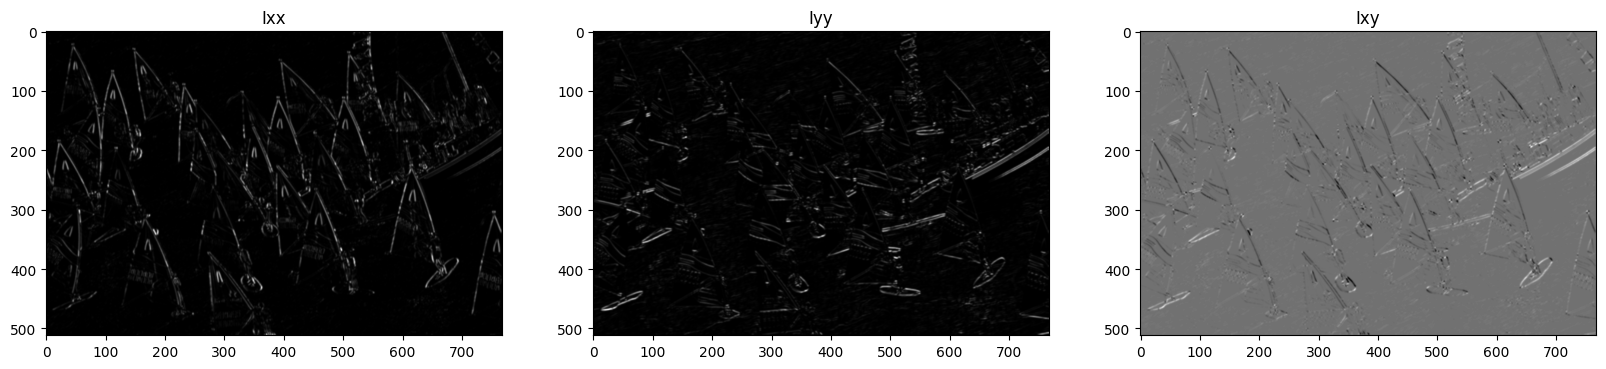

In [3]:
# 可视化
plt.figure(figsize=(20, 5))
plt.subplot(131), plt.imshow(Ixx, cmap='gray'), plt.title('Ixx')
plt.subplot(132), plt.imshow(Iyy, cmap='gray'), plt.title('Iyy')
plt.subplot(133), plt.imshow(Ixy, cmap='gray'), plt.title('Ixy')
plt.show()

## GaussianBlur From Scratch

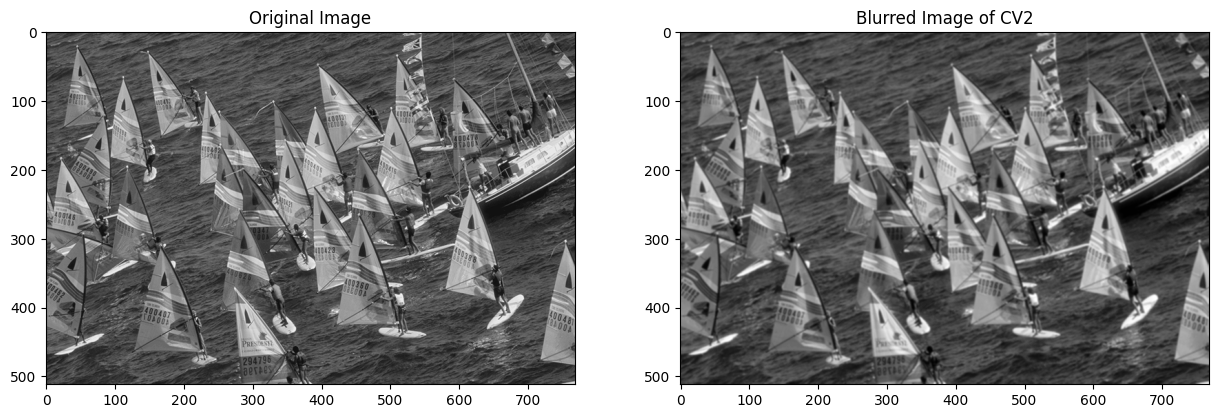

In [7]:
# 先看一下官方效果
window_size = 5
blurred_image_cv2 = cv2.GaussianBlur(image, (window_size, window_size), 0)
plt.figure(figsize=(15, 5))
plt.subplot(121), plt.imshow(image, cmap='gray'), plt.title('Original Image')
plt.subplot(122), plt.imshow(blurred_image_cv2, cmap='gray'), plt.title('Blurred Image of CV2')
plt.show()

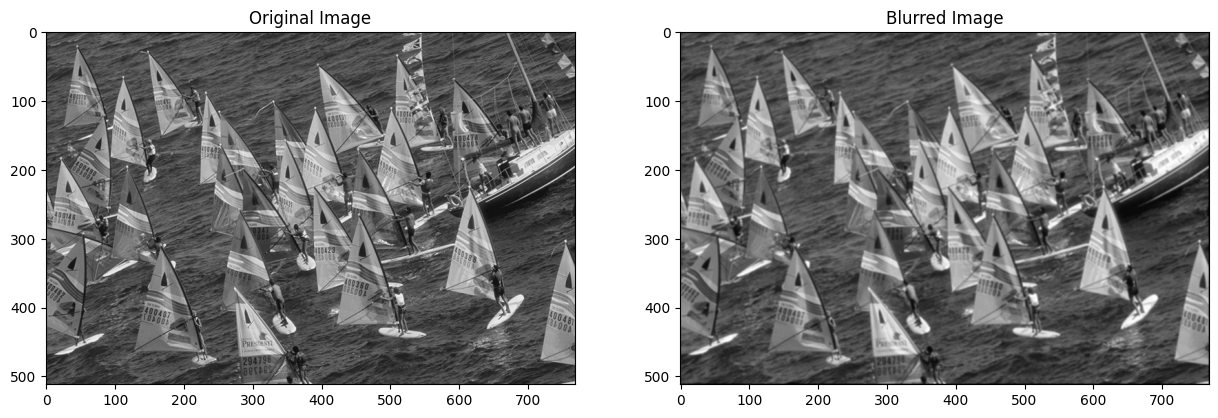

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def gaussian_blur(image, kernel_size):
    # 构建二维高斯核
    kernel = gaussian_kernel(kernel_size)

    # 将高斯核应用于图像
    blurred_image = convolve(image, kernel)

    return blurred_image

def gaussian_kernel(size, sigma=1.0):
    """
    生成二维高斯核
    """
    kernel = np.fromfunction(
        lambda x, y: (1/ (2 * np.pi * sigma ** 2)) * 
                     np.exp(-((x - (size-1)/2) ** 2 + (y - (size-1)/2) ** 2) / (2 * sigma ** 2)),
        (size, size)
    )
    return kernel / np.sum(kernel)

def convolve(image, kernel):
    """
    使用垂直和水平卷积操作将核应用于图像
    """
    result = np.zeros_like(image, dtype=np.float64)
    kernel_size = len(kernel)
    padding = kernel_size // 2

    # 对图像进行填充
    image_padded = np.pad(image, ((padding, padding), (padding, padding)), mode='constant')

    # 执行卷积
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            result[i, j] = np.sum(image_padded[i:i+kernel_size, j:j+kernel_size] * kernel)

    return result

# 读取图像
image = cv2.imread('sails.png', cv2.IMREAD_GRAYSCALE)

# 使用自定义的Gaussian Blur函数进行模糊处理
blurred_image = gaussian_blur(image, kernel_size=5)

# 可视化
plt.figure(figsize=(15, 5))
plt.subplot(121), plt.imshow(image, cmap='gray'), plt.title('Original Image')
plt.subplot(122), plt.imshow(blurred_image, cmap='gray'), plt.title('Blurred Image')
plt.show()
